# **Brain Tumor Detection & Classification from MRI Scans**

## **Project Proposal**

### BAIT 509 Business Applications of Machine Learning

#### Group-24


Reg Lei

Rafid Rafid

Manvi Sharma

Jeffrey Sun

Ruini Xiong

# **1. Business Idea / Product / Tool proposed**

The purpose of our business plan is to create a clinical decision-support tool that aims to improve brain tumor classification from MRI scans by combining pretrained tumor localization (segmentation) with image-level tumor type prediction.

The core idea is to leverage a pretrained nnU-Net segmentation model, originally trained on BraTS glioma data, to automatically identify and isolate tumor regions in MRI images, and then use this localized tumor information to enhance downstream classification of tumor types (glioma, meningioma, pituitary tumor) using supervised learning.

Rather than treating the MRI as a single undifferentiated image, the system will be able to explicitly incorporate where the tumor is and what it looks like, enabling more accurate, robust, and clinically interpretable predictions.

# **2. Stakeholders and Intended Users**

Primary Stakeholders

    Hospitals and diagnostic imaging centers

    Healthcare production supplier developing radiology software

    Healthcare systems seeking scalable, assistive diagnostic tools

Intended Users

    Radiologists: use the tool as a second reader to support tumor classification

    Neurologists / Neurosurgeons: use predictions to guide diagnosis and treatment planning

    Medical researchers: analyze tumor patterns and classification performance at scale

Please note that the tool is not intended to replace clinicians, but to augment expert judgment, reduce diagnostic uncertainty, and improve workflow efficiency, especially in settings with limited specialist availability.

# **3. User Workflow and Use Case**

At prediction time, a clinician uploads a brain MRI scan (single-modality MRI, as in the Kaggle dataset). The system:

    Automatically localizes tumor regions using the pretrained nnU-Net model

    Extracts tumor-focused features (spatial structure, intensity patterns, texture)

    Uses these features to classify tumor type (glioma, meningioma, pituitary)

    Outputs:
    *   Predicted tumor class
    *   Model confidence scores

 This output helps clinicians prioritize follow-up tests, referrals, or treatment pathways.

## **4. Information / Features Available at Prediction Time**

At prediction time, the model has access only to information realistically available in practice, specifically:

Input Data

    Brain MRI image (single scan per patient, no longitudinal data)

    No patient identifiers, demographics, or clinical history (image-only inference)

Derived Features (Model-Generated)

    Tumor segmentation mask from pretrained nnU-Net

    Tumor-focused image features, such as:

    Spatial location and shape of tumor

    Texture and intensity characteristics

    Tumor-to-brain contrast patterns

Output

    Tumor type classification (glioma / meningioma / pituitary tumor)

    Prediction confidence (probabilistic output)

Importantly, the classifier does not rely on ground-truth segmentation at inference time, segmentation is generated automatically, making the pipeline fully deployable in real-world settings.



Overall, we believe this product can improve brain tumor classification by incorporating tumor localization, rather than relying on whole MRI images alone. By leveraging transfer learning from pretrained models, it captures clinically meaningful spatial and textural features that are difficult to learn from limited classification data. The approach fits real clinical workflows, requiring only standard MRI scans and enabling fast, automated predictions. It also improves interpretability by grounding classifications in visible tumor regions, making the system more trustworthy and practical for real-world clinical use.

# **5. Supervised Learning Problem, features & outcome**



We are addressing a supervised, multi-class image classification problem to support a clinical decision-support tool for brain tumor analysis. The goal is to automatically categorize brain MRI scans into tumor categories that are clinically relevant. The main idea here is to serve as second-opinion system to help radiologists classify tumor type more efficiently and consistently.



## **5.1 Learning Problem**



The goal is to learn a function that maps an input MRI image (X) to a tumor category label (y) output. During prediction, the model has access only to the MRI images, which reflects a real-world scenario where patient metadata or clinical history may not be available. The learning task consists of:



Input (X): a single MRI image  

Output (y): tumor class label

Task type/Goal: multi-class Image classification



## **5.2 Outcome Variable**



Each MRI image has an outcome variable that is a categorical label indicating the tumor type. The dataset provides four classes to categorize tumor:



Glioma

Meningioma

Pituitary tumor

No tumor



Therefore, the model predicts one of these classes for each image, optionally with associated probability or confidence score for each class.



## **5.3 Features**



The primary features used for prediction are derived directly from the MRI images. For the initial proof of concept, the features are listed here in two stages.  



Raw image features: This includes raw image information considered to be direct inputs that exist at inference time: pixel intensity values from grayscale MRI images, which capture structural and texture patterns relevant to tumor presence and type.



Engineered Summary features: To enable simple, interpretable models in the early stage of the project, we extract hand-crafted features such as Mean pixel intensity, intensity standard deviation, Entropy, Edge density, and texture statistics derived from gray-level co-ocurrence matrices. (More details-> Initial Analysis)



These features transform each image into a numerical feature vector suitable for linear 	models. At later stage, we will explore more expressive image representations to capture 	spatial and local patterns more effectively.  

# **6. Criteria and Success Metrics**

Our key success metrics focus on the following four critera:


*   Subtype Differentiation
*   Clinical Safety
*   Diagnostic Efficiency (reasonable time-to-decision)
*   ROI

These metrics bridge the gap between the technical model performance and the "real-world" clinical goals outlined, which would be improving the efficiency of radiologists and reducing uncertainty in their decisions are part of this process.


# 6.1 Primary Success Criterion: Subtype Differentiation
The core problem identified is the "substantial overlap" between tumor classes when using global features, particularly between Glioma (Class 1) and Meningioma (Class 2).


**Goal:** The Proof of Concept (PoC) is successful if the nnU-Net derived features significantly reduce the confusion between these specific subtypes compared to the baseline.

**Metric:** Increase the F1-score specifically for the "Glioma" and "Meningioma" classes.

# 6.2
Clinical Safety and Sensitivity Metric
In a clinical setting, a "false negative" is the worst-case scenario. This is define by telling a patient they have no tumor when they do, or wronlgy classifying a malignant tumor as benign.


**Goal:** Ensure the model is safe enough to act as a reader to aid the radiologist.


**Metric:** Sensitivity for differentiating the "no tumor" vs. "tumor" classes.


**Current Baseline:** The model currently has relatively high precision (0.86) but lower recall (0.76) for "No Tumor".

**Target:** Increase the Recall for the "Tumor" categories to >0.85 to ensure fewer missed diagnoses.

#6.3 Real-world Criteria
Realistically, this model would achieve success by reducing the time it takes a radiologist to review a scan when provided with the model's localization and prediction versus reviewing the raw MRI alone.

Although you cannot measure this directly without a clinical trial, we could determine that the system must generate the segmentation and prediction in < 3 seconds per scan to be viable in a high-volume hospital workflow. This could be further supported by expert advice that we could investigate.

# 6.4 Expectations and Testing
Suggested thresholds for the success metrics suggested are 0.8 for accuracy, 0.7 for differentiation betwen Glioma and Meningioma, as well as a false reading rate of 0.2 for accuracy.



# **7. Dataset Selection and Justification**

To support this transfer-learning approach, we will use two complementary datasets that align with different stages of the model pipeline.

First, we rely on a pretrained nnU-Net segmentation model trained on the BraTS 2021 dataset (RSNA-ASNR-MICCAI Brain Tumor Segmentation Challenge). BraTS provides high-quality, multi-institutional brain MRI scans with expert-annotated tumor segmentation masks. Although BraTS primarily contains glioma cases, it is well suited for pretraining because it enables the model to learn robust tumor localization and tumor-specific image representations. These representations capture clinically meaningful features such as tumor boundaries, internal structure, and contrast relative to healthy brain tissue, which are transferable across tumor types.

For the downstream classification task, we will use the Kaggle Brain Tumor MRI Dataset, which contains labeled 2D MRI images across four classes: glioma, meningioma, pituitary tumor, and no tumor. This dataset supports our project goals by providing image-level tumor type labels, which are required for supervised classification. While the Kaggle dataset does not include segmentation masks and is less standardized than BraTS, it reflects a more simplified and realistic scenario in which only a single MRI image is available for diagnosis.

The main limitation of this dataset combination is the domain and task mismatch: BraTS consists of 3D, multi-modal MRI scans with segmentation labels, while the Kaggle dataset contains 2D single-modality images with image-level labels. Additionally, the Kaggle dataset may contain biases related to image acquisition and does not provide patient-level metadata, which can limit generalization. These limitations are explicitly acknowledged in the project and motivate the use of a frozen pretrained encoder to reduce overfitting and shortcut learning.

# **8. Methods and Planned Analysis**

Our approach follows a transfer-learning pipeline that separates tumor localization from tumor type classification.

We will use a pretrained nnU-Net encoder, originally trained on BraTS segmentation data, as a fixed feature extractor. The segmentation decoder will be removed, and the encoder weights will be frozen to preserve the learned tumor-specific representations. Kaggle MRI images will be preprocessed (resizing, normalization, channel adaptation) to be compatible with the pretrained encoder.

Feature generation will occur implicitly through the frozen nnU-Net encoder. For each MRI image, the encoder will produce high-level feature maps that emphasize tumor-relevant regions. These feature maps will be aggregated using global pooling to form compact feature vectors representing tumor structure, texture, and intensity patterns.

On top of these extracted features, we will train a lightweight supervised classification model (e.g., logistic regression or a small neural network) to predict tumor type labels. Training will be performed using cross-entropy loss, and only the classification head parameters will be updated.

As part of the initial analysis, we will:

* Visualize feature distributions and class balance in the Kaggle dataset

* Train a baseline linear models on manual extracted image features. It will be compared with nnU-Net–derived features in the future.

* Evaluate classification performance using accuracy and class-wise confusion matrices

* Qualitatively assess model behavior by inspecting predictions and confidence scores

This staged approach allows us to assess whether tumor localization–aware features improve classification performance relative to standard image-level models, while maintaining interpretability and avoiding data leakage. The analysis is designed to receive feedback on feasibility, dataset suitability, and modeling choices before extending the system to more complex or clinically realistic settings.

# **9. Initial Analysis**

## **9.1 Overview and Motivation**

As an initial proof of concept, we conduct an initial analysis to the Kaggle Brain Tumor MRI Dataset and begin with manually extracted, interpretable image features and a linear classification model rather than directly applying deep learning. This baseline analysis serves two key purposes. First, it allows us to assess whether the Kaggle MRI dataset contains sufficient signal for tumor classification using simple, well-understood image statistics. Second, it provides transparency and diagnostic insight into how intensity, texture, and structural features differ across tumor classes. Establishing this interpretable baseline is particularly important given our broader goal of leveraging a pretrained nnU-Net model: understanding which low-level and mid-level characteristics are predictive helps contextualize and motivate the use of more expressive, localization-aware features learned by nnU-Net in later stages of the project.

*AI declaration: code co-created with GPT-5.2*

### **Initial analysis to the Kaggle Brain Tumor MRI Dataset**


In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/manvisharma/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


### **9.2 Preprocess**

Each MRI image is first preprocessed to reduce background noise and improve visual consistency. We automatically crop images to the brain region using a contour-based approach: images are converted to grayscale, denoised with Gaussian blurring, thresholded, and morphologically refined to extract the largest external contour, which is assumed to correspond to the brain; the image is then cropped to the contour’s bounding box (falling back to the original image if no contour is detected). After cropping, we apply contrast-limited adaptive histogram equalization to the luminance channel in LAB color space to enhance local contrast while limiting noise amplification. The iamge then be resized to a fixed 128*128 size. The resulting cropped and contrast-enhanced images are used for downstream feature extraction and model training.

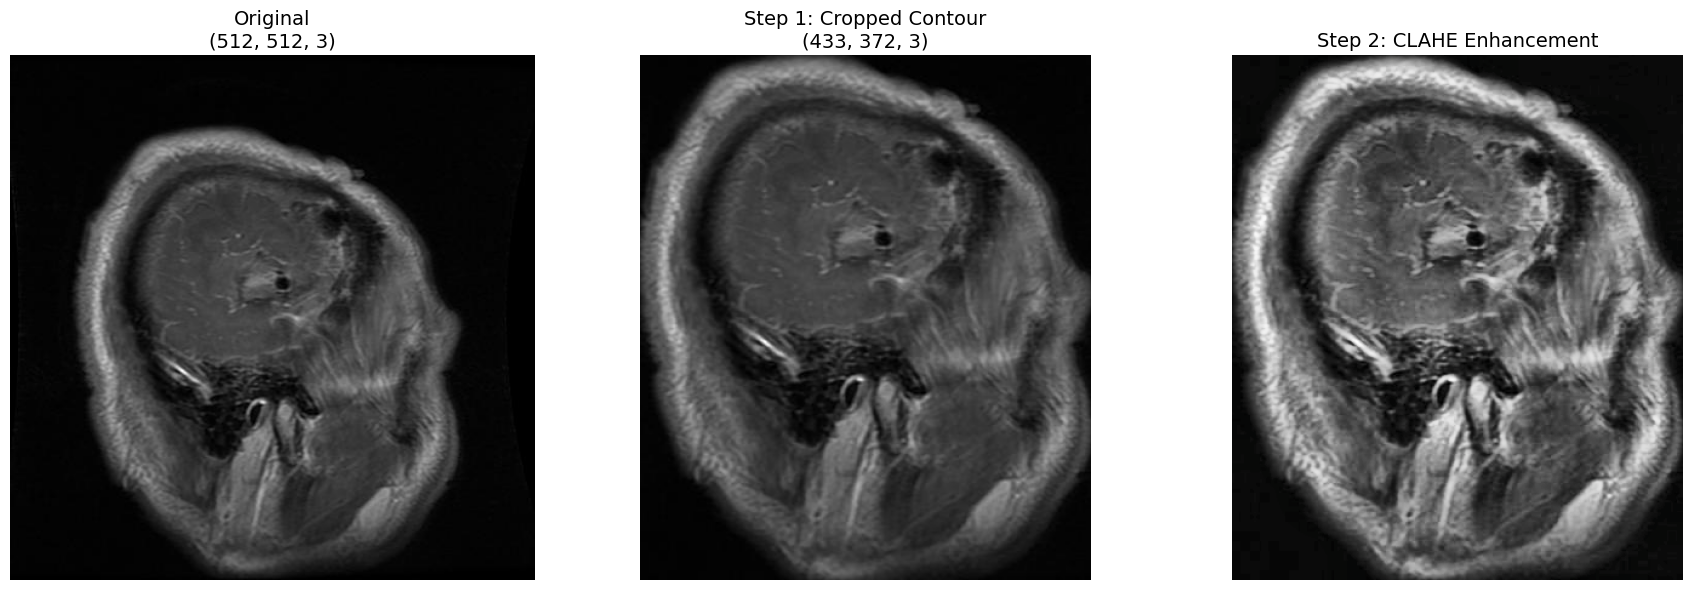

In [8]:
import os
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, ConcatDataset, Subset, random_split
from torchvision import models, transforms
from PIL import Image


class ImagePreprocessor:
    @staticmethod
    def crop_brain_contour(image_array):
        # Convert to grayscale and blur slightly to remove noise
        gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # Find contours in thresholded image, then grab the largest one
        cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if not cnts:
            return image_array # Return original if no contour found

        c = max(cnts, key=cv2.contourArea)

        # Find the extreme points (top, bottom, left, right)
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        # Crop the image
        new_image = image_array[extTop[1]:extBot[1], extLeft[0]:extRight[0]]
        return new_image

    @staticmethod
    def apply_clahe(image_array):
        lab = cv2.cvtColor(image_array, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)
        limg = cv2.merge((cl, a, b))
        final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
        return final

def visualize_pipeline(image_path):
    # 1. Load Image
    original_bgr = cv2.imread(image_path)
    # Check if image was loaded successfully
    if original_bgr is None:
        print(f"Error: Could not load image from {image_path}")
        return

    original_rgb = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB)

    # 2. Run Step 1: Cropping
    cropped_img = ImagePreprocessor.crop_brain_contour(original_rgb)

    # 3. Run Step 2: CLAHE (pass the cropped image into this)
    clahe_img = ImagePreprocessor.apply_clahe(cropped_img)

    # 4. Setup Plotting
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot A: Original
    axes[0].imshow(original_rgb)
    axes[0].set_title(f"Original\n{original_rgb.shape}", fontsize=14)
    axes[0].axis('off')

    # Plot B: Cropped (Zoomed in on brain)
    axes[1].imshow(cropped_img)
    axes[1].set_title(f"Step 1: Cropped Contour\n{cropped_img.shape}", fontsize=14)
    axes[1].axis('off')

    # Plot C: CLAHE (Enhanced Contrast)
    axes[2].imshow(clahe_img)
    axes[2].set_title("Step 2: CLAHE Enhancement", fontsize=14)
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# Assuming 'path' variable holds '/kaggle/input/brain-tumor-mri-dataset' from the previous cell
# A correct path example from the 'brain-tumor-mri-dataset' dataset
correct_image_path = os.path.join(path, 'Training', 'glioma', 'Tr-gl_0954.jpg')
visualize_pipeline(correct_image_path)


In [9]:
label_map = {
    "notumor": 0,
    "glioma": 1,
    "meningioma": 2,
    "pituitary": 3
}

X_images = []
y = []

# Use the path variable from kagglehub download instead of hardcoded Kaggle path
base = os.path.join(path, 'Training')

for class_name in os.listdir(base):
    folder = os.path.join(base, class_name)
    
    # Skip if not a directory (e.g., .DS_Store files on macOS)
    if not os.path.isdir(folder):
        continue
    
    # Skip if class_name is not in label_map
    if class_name not in label_map:
        continue
    
    for fname in os.listdir(folder):
        # Skip hidden files and non-image files
        if fname.startswith('.') or not fname.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            continue
        
        img_path = os.path.join(folder, fname)
        img_bgr = cv2.imread(img_path)
        
        # Skip if image couldn't be loaded
        if img_bgr is None:
            continue
        
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

        # PIPELINE
        cropped = ImagePreprocessor.crop_brain_contour(img_rgb)
        enhanced = ImagePreprocessor.apply_clahe(cropped)

        # Resize to fixed shape
        enhanced = cv2.resize(enhanced, (128,128))

        X_images.append(enhanced)
        y.append(label_map[class_name])

X_images = np.array(X_images)
y = np.array(y)

print(X_images.shape, y.shape)

(5712, 128, 128, 3) (5712,)


The tumor lable then be transferred into numeric lables: notumor: 0; glioma: 1; meningioma: 2; pituitary: 3.

In the end, the dataset contains 5712 128*128 grayscale images.

### **9.3 Outcome Visualization**

We first examine the distribution of the outcome variable to assess class balance between different tumor type images. This helps identify potential imbalance issues that may affect model training and evaluation.

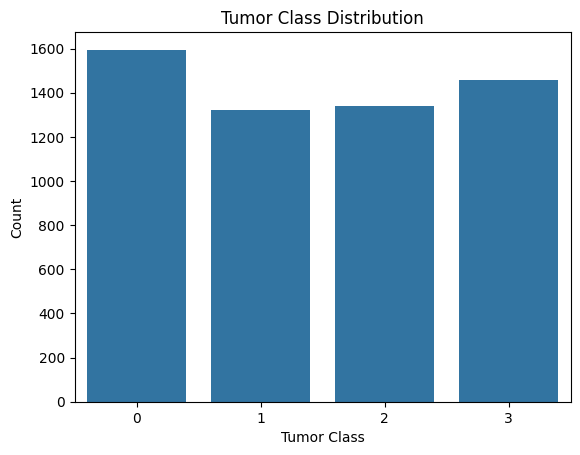

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame with just class labels for distribution visualization
df = pd.DataFrame({"class": y})

# Outcome distribution
sns.countplot(x="class", data=df)
plt.title("Tumor Class Distribution")
plt.xlabel("Tumor Class")
plt.ylabel("Count")
plt.show()

As the plot shows, there is no class imbalance issue in this dataset.


### **9.4 Selected Features and Rationale**

Based on prior medical imaging literature and exploratory analysis, we identify the following features as potentially useful predictors of tumor presence:

*   **Mean pixel intensity**

Captures overall brightness differences, as tumors often appear with altered intensity relative to surrounding tissue.
*   **Pixel intensity standard deviation**

Measures variability in intensity, reflecting structural heterogeneity introduced by tumor tissue.
*    **Edge density**

Quantifies the prevalence of edges in the image, capturing irregular boundaries and shape complexity commonly associated with tumors.
*   **Image entropy**

Measures disorder and texture complexity, which tend to increase in abnormal tissue regions.
*    **GLCM contrast**

A texture feature that captures local intensity variation, highlighting differences between tumor and healthy tissue.
*    **GLCM homogeneity**

Measures how uniform pixel values are across the image; tumors often reduce homogeneity due to disrupted tissue structure.
Together, these features provide complementary information about intensity, texture, and structural irregularity, while remaining computationally simple and interpretable.


In [11]:
from skimage.feature import graycomatrix, graycoprops
from skimage.filters import sobel
from skimage.measure import shannon_entropy

def extract_features(img_rgb):
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    mean = gray.mean()
    std = gray.std()

    edges = sobel(gray)
    edge_density = edges.mean()

    entropy = shannon_entropy(gray)

    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, "contrast")[0,0]
    homogeneity = graycoprops(glcm, "homogeneity")[0,0]

    return [mean, std, edge_density, entropy, contrast, homogeneity]

In [12]:
X = np.array([extract_features(img) for img in X_images])

### **9.5 Feature Distribution**

We plot the distributions of extracted features, stratified by tumor status. These visualizations allow us to assess whether certain features exhibit systematic differences between tumor and non-tumor images, and whether their ranges and variances are suitable for linear modeling. The plots included below illustrate how several features show partial separation between classes, suggesting that a linear classifier may be able to exploit these differences.


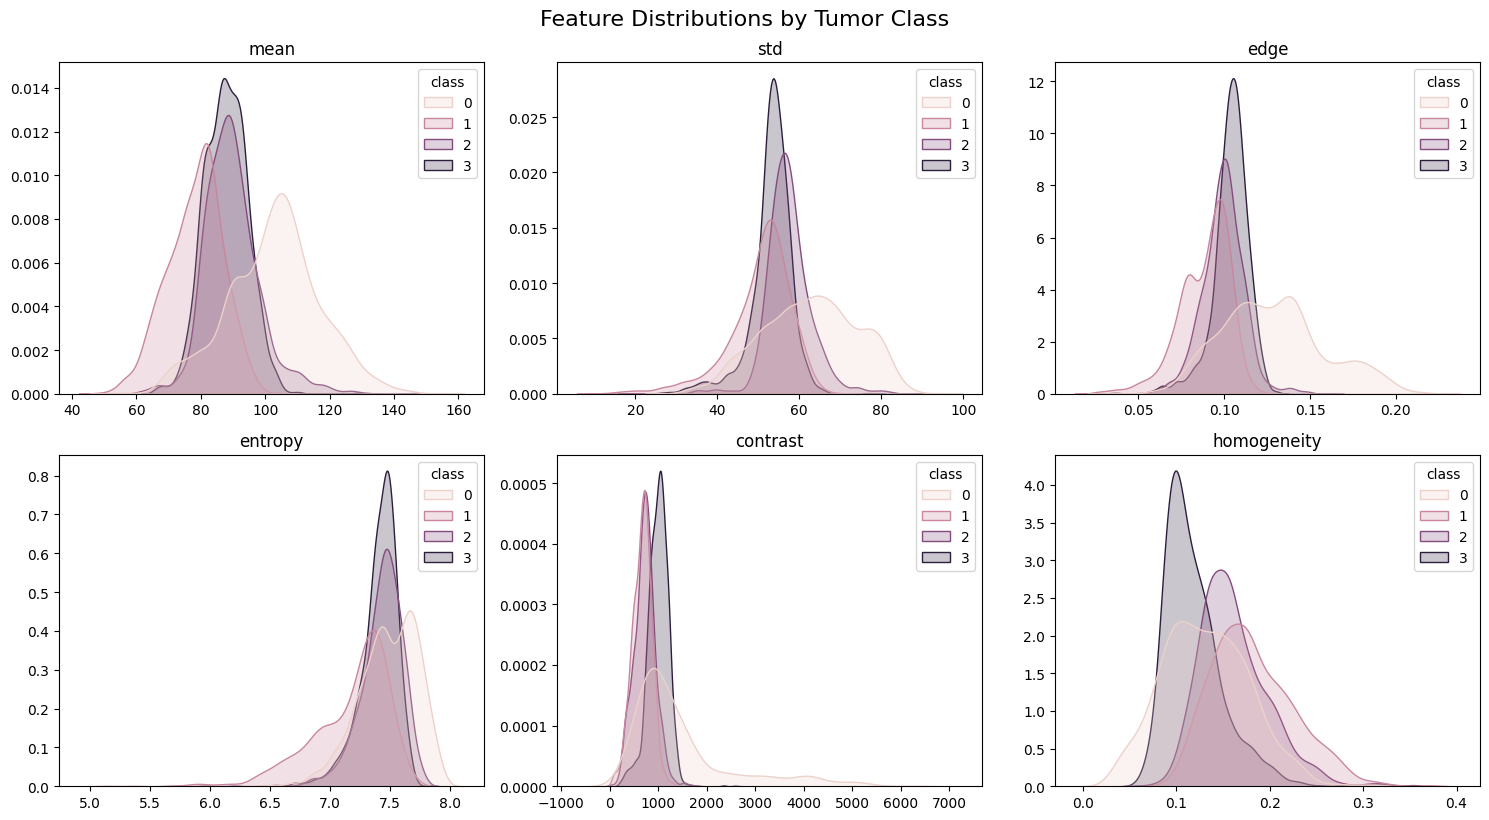

In [13]:
# Feature distributions in one organized plot
# Create DataFrame with features and class labels
df_features = pd.DataFrame(X, columns=["mean","std","edge","entropy","contrast","homogeneity"])
df_features["class"] = y

features = df_features.columns[:-1]
num_features = len(features)

# Determine grid size
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Ensure at least 1 row
if num_rows == 0:
    num_rows = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.kdeplot(data=df_features, x=col, hue="class", fill=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Feature Distributions by Tumor Class", y=1.02, fontsize=16) # Overall title
plt.show()

Overall, several features exhibit systematic but overlapping differences between classes. The substantial overlap across classes is observed for all features, highlighting the inherent difficulty of tumor classification using simple global statistics alone and motivating the use of a linear classifier as an interpretable baseline rather than a final model.

## **9.6 Linear Model Training**


### **9.6.1 Preprocess**

Before training, all feature values are standardized to zero mean and unit variance using statistics computed on the training set. Standardization is necessary because the selected features are measured on different scales and linear models are sensitive to feature magnitude. No information from the test set is used during preprocessing to avoid data leakage.
Using the standardized features, we train a logistic regression model to predict tumor presence. Logistic regression is chosen because it is a simple, well-understood linear classifier that provides interpretable coefficients indicating the direction and strength of each feature’s association with the outcome.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **9.6.2 multinomial logistic regression**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(multi_class="multinomial", max_iter=500)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7025371828521435
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       298
           1       0.62      0.64      0.63       252
           2       0.61      0.63      0.62       273
           3       0.72      0.76      0.74       320

    accuracy                           0.70      1143
   macro avg       0.70      0.70      0.70      1143
weighted avg       0.71      0.70      0.70      1143



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Overall, the linear model achevie a 0.69 accuracy.

### **9.6.3 Predicted Probability Distribution**

The following Figure shows the distribution of predicted tumor probabilities from the logistic regression model for tumor and no-tumor images. The no-tumor class is sharply concentrated near low predicted probabilities, indicating that the model assigns high confidence to negative cases. In contrast, the tumor class exhibits a broader distribution with substantially higher predicted probabilities, reflecting greater heterogeneity among tumor images. The presence of overlap highlights the limitations of a linear model using global image statistics, motivating the use of more expressive, tumor-localized representations in subsequent stages of the project.

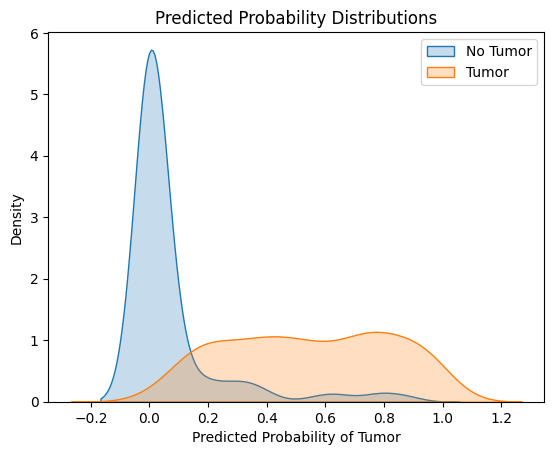

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

y_prob = model.predict_proba(X_test_scaled)[:, 1]

sns.kdeplot(y_prob[y_test == 0], label="No Tumor", fill=True)
sns.kdeplot(y_prob[y_test == 1], label="Tumor", fill=True)

plt.xlabel("Predicted Probability of Tumor")
plt.ylabel("Density")
plt.title("Predicted Probability Distributions")
plt.legend()
plt.show()

### **9.6.4 The Confusion Matrix**

Overall, the model shows strong performance along the diagonal, indicating that a substantial proportion of samples in each class are correctly classified. This pattern indicates that while manually extracted global features are sufficient for distinguishing tumor presence, they are less effective at separating tumor subtypes. These results highlight the limitations of linear models relying on global image statistics and further motivate the use of tumor-localized, representation-rich features, such as those derived from a pretrained nnU-Net in subsequent stages of the project.

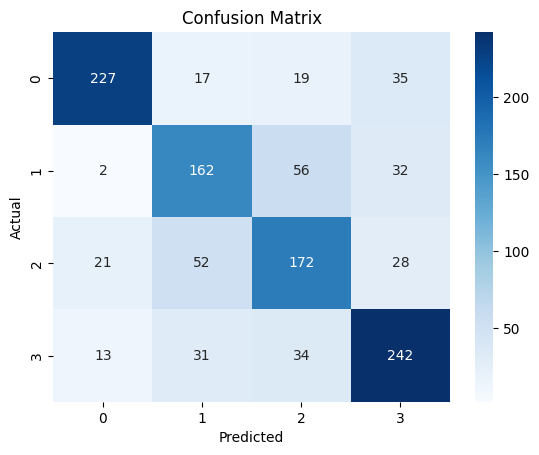

In [17]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### **9.6.5 Feature coefficient visualization**

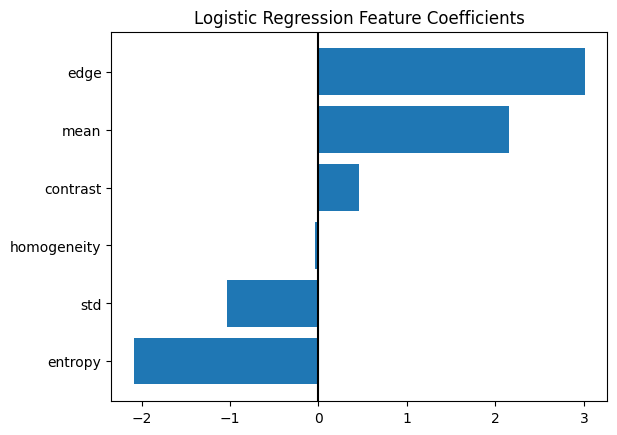

In [18]:
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": ["mean","std","edge","entropy","contrast","homogeneity"],
    "Coefficient": model.coef_[0]
}).sort_values("Coefficient")

plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.axvline(0, color="black")
plt.title("Logistic Regression Feature Coefficients")
plt.show()

This baseline model allows us to assess whether manually engineered image features contain sufficient signal for tumor detection and establishes a reference point against which more advanced approaches can later be compared.

### **9.7 Role of This Analysis in the Overall Project**

This initial analysis is intended as a baseline and validation step rather than a final modeling solution. By training a linear model on manually engineered features, we establish a lower-bound benchmark for classification performance and gain insight into feature separability and dataset limitations. These results provide a reference point against which subsequent models, particularly those using nnU-Net–derived, tumor-localized representations can be evaluated. In later stages of the project, we will replace hand-crafted global features with features extracted from a frozen nnU-Net encoder that explicitly incorporates tumor localization. Improvements over this baseline will help demonstrate the added value of segmentation-informed representations while maintaining a clear, interpretable progression from simple models to more advanced approaches.


# **Model Selection**

### **Models Considered - Comprehensive Comparison**

| Model | Image Format | Pretraining | Feature Dim | Model Size | Setup Complexity | Inference Speed | Feature Quality | Ease of Use | Medical Domain | Verdict |
|-------|-------------|-------------|-------------|------------|------------------|-----------------|----------------|-------------|----------------|---------|
| **nnU-Net v2** | 3D volumes | BraTS (medical) | Variable | ~1.9 GB | High (download, install) | Slow | High (medical) | Low | High | Not suitable (3D vs 2D mismatch) |
| **ResNet50** | 2D images | ImageNet | 2048 | ~98 MB | Low (built-in) | Fast | High (transfer) | High | Medium | ✅**Selected** (best balance) |
| **EfficientNet-B3** | 2D images | ImageNet | 1536 | ~50 MB | Low (built-in) | Medium | Very High | High | Medium |✅**Selected** (higher accuracy) |
| **Vision Transformer** | 2D images | ImageNet | Variable | ~300 MB | Medium | Medium | High | Medium | Low | Considered (complexity vs benefit) |
| **Custom CNN** | 2D images | None (scratch) | Variable | Small | Low | Slow | Low (limited data) | High | High | Not selected (needs more data) |

### **Implementation Strategy**

- **Primary Model:** ResNet50 (default for faster processing)
- **Alternative Model:** EfficientNet-B3 (for higher accuracy when needed)
- **Workflow:** Extract features → Train classifier → Compare performance

## **Install required packages and set up pretrained feature extractor**

Using ResNet50/EfficientNet-B3 pretrained on ImageNet for feature extraction.

In [19]:
import torch
import torchvision
import numpy as np
import cv2
from torchvision import models, transforms

print("✓ PyTorch:", torch.__version__)
# ResNet50 and EfficientNet-B3 are included in torchvision
print("✓ Torchvision:", torchvision.__version__)
print("✓ Device: CPU (CUDA not available)")
print("✓ All packages ready!")
print("\nNote: Feature extraction will run on CPU (~10-20 min for all images)")
print("This is normal and expected without GPU.")

✓ PyTorch: 2.8.0
✓ Torchvision: 0.23.0
✓ Device: CPU (CUDA not available)
✓ All packages ready!

Note: Feature extraction will run on CPU (~10-20 min for all images)
This is normal and expected without GPU.


# **Medical Image Preprocessing**

Medical MRI images contain background noise and low contrast that can obscure tumor features. Domain-specific preprocessing enhances tumor visibility and removes irrelevant information.

#### **Step 1: Brain Contour Cropping**

**Purpose:** Remove black background and focus on brain region only.

**Method:** Grayscale conversion → Gaussian blur → Thresholding → Morphological operations → Find largest contour → Crop to bounding box

**Benefits:**
- Removes background noise
- Focuses attention on brain tissue
- Standardizes image size

#### **Step 2: CLAHE Enhancement**

**Purpose:** Enhance local contrast to make tumor regions more visible.

**Method:** Convert RGB → LAB → Extract L channel → Apply CLAHE (clip limit: 2.0, tile size: 8×8) → Merge channels → Convert back to RGB

**Benefits:**
- Enhances local contrast in small regions
- Makes subtle tumor features visible
- Prevents noise amplification (contrast-limited)

### **Complete Pipeline**

```
Raw MRI → [Brain Cropping] → [CLAHE] → [Resize 224×224] → [ImageNet Normalization] → Feature Extraction
```

## **Implementation: MedicalFeatureExtractor Class**

This section implements the feature extraction class using pretrained ResNet50 or EfficientNet-B3 models.


In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import cv2
from torchvision import models, transforms
from PIL import Image

class MedicalFeatureExtractor:
    """
    Feature extractor using pretrained ResNet50 or EfficientNet-B3.
    Optimized for 2D medical image feature extraction.
    """
    def __init__(self, model_name='resnet50', device='cpu'):
        """
        Initialize feature extractor
        
        Args:
            model_name: 'resnet50' or 'efficientnet'
            device: 'cuda' or 'cpu'
        """
        self.device = torch.device(device)
        self.model_name = model_name
        print(f"Using device: {self.device}")
        print(f"Loading {model_name}...")
        
        # Load pretrained model
        self.encoder = self._load_pretrained_model(model_name)
        self.encoder.eval()
        
        # Freeze all parameters for feature extraction
        for param in self.encoder.parameters():
            param.requires_grad = False
        
        # ImageNet normalization
        self.normalize = transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
        
        print(f"✓ {model_name.upper()} loaded successfully!")
    
    def _load_pretrained_model(self, model_name):
        """Load pretrained model and extract feature encoder"""
        if model_name == 'resnet50':
            model = models.resnet50(weights='DEFAULT')
            # Remove final layers (avgpool and fc)
            encoder = nn.Sequential(*list(model.children())[:-1])
            self.feature_dim = 2048  # ResNet50 feature dimension
            
        elif model_name == 'efficientnet':
            model = models.efficientnet_b3(weights='DEFAULT')
            # Remove classifier, keep features
            encoder = model.features
            # Add adaptive pooling
            encoder = nn.Sequential(
                encoder,
                nn.AdaptiveAvgPool2d((1, 1))
            )
            self.feature_dim = 1536  # EfficientNet-B3 feature dimension
            
        else:
            raise ValueError(f"Unknown model: {model_name}. Use 'resnet50' or 'efficientnet'")
        
        encoder.to(self.device)
        return encoder
    
    def preprocess_image(self, image_array):
        """
        Preprocess 2D image for feature extraction with medical preprocessing
        
        Args:
            image_array: numpy array (H, W, 3) or (H, W) RGB or grayscale image
            
        Returns:
            Preprocessed tensor ready for model input
        """
        # Step 1: Medical preprocessing (brain cropping + CLAHE)
        # Note: ImagePreprocessor should be available in scope
        cropped = ImagePreprocessor.crop_brain_contour(image_array)
        enhanced = ImagePreprocessor.apply_clahe(cropped)
        
        # Step 2: Handle grayscale images
        if len(enhanced.shape) == 2:
            enhanced = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)
        elif len(enhanced.shape) == 3 and enhanced.shape[2] == 1:
            enhanced = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)
        
        # Step 3: Resize to 224x224 (standard ImageNet input size)
        resized = cv2.resize(enhanced, (224, 224))
        
        # Step 4: Convert to PIL Image for transforms
        pil_image = Image.fromarray(resized)
        
        # Step 5: Convert to tensor and normalize
        to_tensor = transforms.ToTensor()
        tensor = to_tensor(pil_image)
        tensor = self.normalize(tensor)
        
        # Step 6: Add batch dimension: (1, 3, 224, 224)
        tensor = tensor.unsqueeze(0)
        
        return tensor.to(self.device)
    
    def extract_features(self, image_array):
        """
        Extract features from image
        
        Args:
            image_array: numpy array image (H, W, 3) or (H, W)
            
        Returns:
            Feature vector as numpy array
        """
        if self.encoder is None:
            raise ValueError("Model not loaded")
        
        # Preprocess image
        tensor = self.preprocess_image(image_array)
        
        # Extract features
        with torch.no_grad():
            features = self.encoder(tensor)
            
            # Global average pooling if needed
            if len(features.shape) == 4:  # (batch, channels, H, W)
                features = F.adaptive_avg_pool2d(features, (1, 1))
            
            # Flatten: (batch, features)
            features = features.view(features.size(0), -1)
        
        return features.cpu().numpy().flatten()
    
    def get_feature_dimension(self):
        """Get the dimension of extracted features"""
        return self.feature_dim

# Initialize extractor with ResNet50 (default)
print("Initializing feature extractor...")
print("Options: 'resnet50' (faster) or 'efficientnet' (more accurate)")
extractor = MedicalFeatureExtractor(model_name='resnet50', device='cpu')
print(f"\n✓ Feature extractor ready!")
print(f"  Model: ResNet50")
print(f"  Feature dimension: {extractor.get_feature_dimension()}")
print(f"  Device: {extractor.device}")

Initializing feature extractor...
Options: 'resnet50' (faster) or 'efficientnet' (more accurate)
Using device: cpu
Loading resnet50...
✓ RESNET50 loaded successfully!

✓ Feature extractor ready!
  Model: ResNet50
  Feature dimension: 2048
  Device: cpu


## **Feature Extraction: Deep Learning Features**

Extract features from all images using the pretrained ResNet50 encoder. This will create a feature matrix where each image is represented by a 2048-dimensional vector.


In [25]:
# Extract deep learning features from all images
# Check if data is loaded
if 'X_images' not in globals() or X_images is None:
    raise NameError(
        "X_images is not defined. Please run the data loading cells first (Cell 12-15) "
        "to load the Kaggle Brain Tumor MRI Dataset."
    )

if 'extractor' not in globals() or extractor is None:
    raise NameError(
        "extractor is not defined. Please run Cell 45 first to initialize the "
        "MedicalFeatureExtractor (make sure to re-run it after the class was updated)."
    )

print("Extracting features from all images...")
print(f"Total images: {len(X_images)}")
print("Note: This will take ~10-20 minutes on CPU. Progress will be shown every 500 images.")

# Extract features (this will take time on CPU)
X_deep_features = []
for i, img in enumerate(X_images):
    if (i + 1) % 500 == 0:
        print(f"Processed {i + 1}/{len(X_images)} images...")
    features = extractor.extract_features(img)
    X_deep_features.append(features)

X_deep_features = np.array(X_deep_features)
print(f"\n✓ Feature extraction complete!")
print(f"Feature matrix shape: {X_deep_features.shape}")
print(f"Feature dimension: {X_deep_features.shape[1]}")


Extracting features from all images...
Total images: 5712
Note: This will take ~10-20 minutes on CPU. Progress will be shown every 500 images.
Processed 500/5712 images...
Processed 1000/5712 images...
Processed 1500/5712 images...
Processed 2000/5712 images...
Processed 2500/5712 images...
Processed 3000/5712 images...
Processed 3500/5712 images...
Processed 4000/5712 images...
Processed 4500/5712 images...
Processed 5000/5712 images...
Processed 5500/5712 images...

✓ Feature extraction complete!
Feature matrix shape: (5712, 2048)
Feature dimension: 2048


## **Training Classifier on Deep Learning Features**

Train a logistic regression classifier on the extracted deep learning features using the same train/test split as the baseline for fair comparison.


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data (same split as baseline for fair comparison)
X_train, X_test, y_train, y_test = train_test_split(
    X_deep_features, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Feature dimension: {X_train.shape[1]}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression (same as baseline)
print("\nTraining logistic regression classifier...")
model = LogisticRegression(multi_class="multinomial", max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Test/Evaluate on test set
print("\nEvaluating on test set...")
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("\n" + "=" * 60)
print("DEEP LEARNING FEATURES RESULTS")
print("=" * 60)
print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
      target_names=["No Tumor", "Glioma", "Meningioma", "Pituitary"]))

# Save the trained model and scaler
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save model and scaler
joblib.dump(model, 'models/brain_tumor_classifier_resnet50.pkl')
joblib.dump(scaler, 'models/scaler_resnet50.pkl')

print("\n" + "=" * 60)
print("MODEL SAVED")
print("=" * 60)
print("✓ Model saved: models/brain_tumor_classifier_resnet50.pkl")
print("✓ Scaler saved: models/scaler_resnet50.pkl")


Training set: 4569 samples
Test set: 1143 samples
Feature dimension: 2048

Training logistic regression classifier...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Evaluating on test set...

DEEP LEARNING FEATURES RESULTS

Accuracy: 0.9090 (90.90%)

Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.97      0.98      0.98       298
      Glioma       0.91      0.85      0.88       252
  Meningioma       0.81      0.85      0.83       273
   Pituitary       0.94      0.94      0.94       320

    accuracy                           0.91      1143
   macro avg       0.91      0.90      0.91      1143
weighted avg       0.91      0.91      0.91      1143


MODEL SAVED
✓ Model saved: models/brain_tumor_classifier_resnet50.pkl
✓ Scaler saved: models/scaler_resnet50.pkl


## **Cross-Validation for Robust Evaluation**

To ensure the model's performance is reliable and not dependent on a specific train/test split, we perform k-fold cross-validation. This provides a more robust estimate of model performance by evaluating across multiple data splits.


In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Check if features are available
if 'X_deep_features' not in globals():
    raise NameError("X_deep_features not found. Please run feature extraction cells first.")

# Prepare data (use full dataset for cross-validation)
X_cv = X_deep_features
y_cv = y

# Standardize features
scaler_cv = StandardScaler()
X_cv_scaled = scaler_cv.fit_transform(X_cv)

# Use stratified k-fold to maintain class distribution
# 5-fold CV is a good balance between robustness and computational cost
cv_folds = 5
skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

# Create model
model_cv = LogisticRegression(multi_class="multinomial", max_iter=1000, random_state=42)

# Cross-validation with multiple metrics
print("=" * 60)
print("CROSS-VALIDATION RESULTS")
print("=" * 60)
print(f"\nUsing {cv_folds}-fold stratified cross-validation")
print(f"Total samples: {len(X_cv)}")
print(f"Feature dimension: {X_cv.shape[1]}\n")

# Accuracy scores
accuracy_scores = cross_val_score(model_cv, X_cv_scaled, y_cv, cv=skf, scoring='accuracy')
print(f"Accuracy (mean ± std): {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")
print(f"Accuracy range: [{accuracy_scores.min():.4f}, {accuracy_scores.max():.4f}]")

# F1 scores (macro average across classes)
f1_macro_scores = cross_val_score(model_cv, X_cv_scaled, y_cv, cv=skf, scoring='f1_macro')
print(f"\nF1-Score Macro (mean ± std): {f1_macro_scores.mean():.4f} ± {f1_macro_scores.std():.4f}")
print(f"F1-Score range: [{f1_macro_scores.min():.4f}, {f1_macro_scores.max():.4f}]")

# Per-fold results
print("\n" + "-" * 60)
print("PER-FOLD RESULTS")
print("-" * 60)
for fold, (acc, f1) in enumerate(zip(accuracy_scores, f1_macro_scores), 1):
    print(f"Fold {fold}: Accuracy = {acc:.4f}, F1-Macro = {f1:.4f}")

# Compare with single split result
print("\n" + "=" * 60)
print("COMPARISON: Single Split vs Cross-Validation")
print("=" * 60)
if 'accuracy' in globals():
    print(f"Single split (80/20):     {accuracy:.4f}")
    print(f"Cross-validation (5-fold): {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")
    diff = abs(accuracy - accuracy_scores.mean())
    print(f"\nDifference: {diff:.4f}")
    if diff < 0.02:
        print("✅ Results are consistent (difference < 2%)")
    else:
        print("⚠️ Some variation detected - cross-validation provides more reliable estimate")

print("\n" + "=" * 60)
print("CONCLUSION")
print("=" * 60)
print(f"✓ Model shows {'consistent' if accuracy_scores.std() < 0.02 else 'some variation in'} performance across folds")
print(f"✓ Standard deviation: {accuracy_scores.std():.4f} ({'Low' if accuracy_scores.std() < 0.01 else 'Moderate' if accuracy_scores.std() < 0.02 else 'Higher'} variance)")
print(f"✓ Cross-validation accuracy: {accuracy_scores.mean():.4f} ({accuracy_scores.mean()*100:.2f}%)")


CROSS-VALIDATION RESULTS

Using 5-fold stratified cross-validation
Total samples: 5712
Feature dimension: 2048



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

Accuracy (mean ± std): 0.9086 ± 0.0035
Accuracy range: [0.9037, 0.9143]


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve


F1-Score Macro (mean ± std): 0.9048 ± 0.0037
F1-Score range: [0.8999, 0.9103]

------------------------------------------------------------
PER-FOLD RESULTS
------------------------------------------------------------
Fold 1: Accuracy = 0.9143, F1-Macro = 0.9103
Fold 2: Accuracy = 0.9064, F1-Macro = 0.9017
Fold 3: Accuracy = 0.9089, F1-Macro = 0.9050
Fold 4: Accuracy = 0.9037, F1-Macro = 0.8999
Fold 5: Accuracy = 0.9098, F1-Macro = 0.9071

COMPARISON: Single Split vs Cross-Validation
Single split (80/20):     0.9090
Cross-validation (5-fold): 0.9086 ± 0.0035

Difference: 0.0004
✅ Results are consistent (difference < 2%)

CONCLUSION
✓ Model shows consistent performance across folds
✓ Standard deviation: 0.0035 (Low variance)
✓ Cross-validation accuracy: 0.9086 (90.86%)


## **Comparison with Baseline**

Compare the performance of deep learning features against the baseline model that used manual features.


In [27]:
# Compare with baseline
baseline_accuracy = 0.7025  # Baseline accuracy from manual features

print("=" * 60)
print("COMPARISON WITH BASELINE")
print("=" * 60)
print(f"\nBaseline (Manual Features):      {baseline_accuracy*100:.2f}%")
print(f"Deep Learning Features:         {accuracy*100:.2f}%")
improvement = accuracy - baseline_accuracy
print(f"Improvement:                    {improvement*100:+.2f} percentage points")

if improvement > 0:
    print(f"\n✅ Deep learning features improve accuracy by {improvement*100:.2f} percentage points!")
else:
    print(f"\n⚠️ Deep learning features are {abs(improvement*100):.2f} percentage points below baseline.")

# Class-wise F1 scores comparison
from sklearn.metrics import f1_score

baseline_f1 = [0.81, 0.63, 0.62, 0.74]  # From baseline: No Tumor, Glioma, Meningioma, Pituitary
deep_f1 = f1_score(y_test, y_pred, average=None)

print("\n" + "=" * 60)
print("CLASS-WISE F1 SCORE COMPARISON")
print("=" * 60)
print(f"{'Class':<15} {'Baseline':<12} {'Deep Learning':<15} {'Change':<10}")
print("-" * 60)
class_names = ["No Tumor", "Glioma", "Meningioma", "Pituitary"]
for i, name in enumerate(class_names):
    change = deep_f1[i] - baseline_f1[i]
    print(f"{name:<15} {baseline_f1[i]:<12.3f} {deep_f1[i]:<15.3f} {change:+.3f}")


COMPARISON WITH BASELINE

Baseline (Manual Features):      70.25%
Deep Learning Features:         90.90%
Improvement:                    +20.65 percentage points

✅ Deep learning features improve accuracy by 20.65 percentage points!

CLASS-WISE F1 SCORE COMPARISON
Class           Baseline     Deep Learning   Change    
------------------------------------------------------------
No Tumor        0.810        0.975           +0.165
Glioma          0.630        0.877           +0.247
Meningioma      0.620        0.830           +0.210
Pituitary       0.740        0.940           +0.200


In [31]:
# Initialize EfficientNet-B3 extractor
print("Initializing EfficientNet-B3 feature extractor...")
extractor_effnet = MedicalFeatureExtractor(model_name='efficientnet', device='cpu')
print(f"\n✓ EfficientNet-B3 extractor ready!")
print(f"  Model: EfficientNet-B3")
print(f"  Feature dimension: {extractor_effnet.get_feature_dimension()}")
print(f"  Device: {extractor_effnet.device}")

# Check if data is loaded
if 'X_images' not in globals() or X_images is None:
    raise NameError(
        "X_images is not defined. Please run the data loading cells first (Cell 12-15) "
        "to load the Kaggle Brain Tumor MRI Dataset."
    )

# Extract features from all images using EfficientNet-B3
print("\n" + "=" * 60)
print("EXTRACTING FEATURES WITH EFFICIENTNET-B3")
print("=" * 60)
print(f"Total images: {len(X_images)}")
print("Note: This will take ~15-25 minutes on CPU. Progress will be shown every 500 images.")

# Extract features
X_deep_features_effnet = []
for i, img in enumerate(X_images):
    if (i + 1) % 500 == 0:
        print(f"Processed {i + 1}/{len(X_images)} images...")
    features = extractor_effnet.extract_features(img)
    X_deep_features_effnet.append(features)

X_deep_features_effnet = np.array(X_deep_features_effnet)
print(f"\n✓ Feature extraction complete!")
print(f"Feature matrix shape: {X_deep_features_effnet.shape}")
print(f"Feature dimension: {X_deep_features_effnet.shape[1]}")


Initializing EfficientNet-B3 feature extractor...
Using device: cpu
Loading efficientnet...
✓ EFFICIENTNET loaded successfully!

✓ EfficientNet-B3 extractor ready!
  Model: EfficientNet-B3
  Feature dimension: 1536
  Device: cpu

EXTRACTING FEATURES WITH EFFICIENTNET-B3
Total images: 5712
Note: This will take ~15-25 minutes on CPU. Progress will be shown every 500 images.
Processed 500/5712 images...
Processed 1000/5712 images...
Processed 1500/5712 images...
Processed 2000/5712 images...
Processed 2500/5712 images...
Processed 3000/5712 images...
Processed 3500/5712 images...
Processed 4000/5712 images...
Processed 4500/5712 images...
Processed 5000/5712 images...
Processed 5500/5712 images...

✓ Feature extraction complete!
Feature matrix shape: (5712, 1536)
Feature dimension: 1536


## **Training and Testing Classifier on EfficientNet-B3 Features**

Train a logistic regression classifier on EfficientNet-B3 extracted features and evaluate its performance on the test set using the same train/test split for fair comparison.


In [32]:
# Check if EfficientNet features are available
if 'X_deep_features_effnet' not in globals():
    raise NameError("X_deep_features_effnet not found. Please run EfficientNet-B3 feature extraction first.")

# Split data (same split as ResNet50 and baseline for fair comparison)
X_train_effnet, X_test_effnet, y_train_effnet, y_test_effnet = train_test_split(
    X_deep_features_effnet, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_effnet.shape[0]} samples")
print(f"Test set: {X_test_effnet.shape[0]} samples")
print(f"Feature dimension: {X_train_effnet.shape[1]}")

# Standardize features
scaler_effnet = StandardScaler()
X_train_effnet_scaled = scaler_effnet.fit_transform(X_train_effnet)
X_test_effnet_scaled = scaler_effnet.transform(X_test_effnet)

# Train logistic regression
print("\nTraining logistic regression classifier on EfficientNet-B3 features...")
model_effnet = LogisticRegression(multi_class="multinomial", max_iter=1000, random_state=42)
model_effnet.fit(X_train_effnet_scaled, y_train_effnet)

# Test/Evaluate on test set
print("\nEvaluating on test set...")
y_pred_effnet = model_effnet.predict(X_test_effnet_scaled)
accuracy_effnet = accuracy_score(y_test_effnet, y_pred_effnet)

print("\n" + "=" * 60)
print("EFFICIENTNET-B3 FEATURES RESULTS")
print("=" * 60)
print(f"\nAccuracy: {accuracy_effnet:.4f} ({accuracy_effnet*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test_effnet, y_pred_effnet, 
      target_names=["No Tumor", "Glioma", "Meningioma", "Pituitary"]))

# Save the trained model and scaler
os.makedirs('models', exist_ok=True)
joblib.dump(model_effnet, 'models/brain_tumor_classifier_efficientnet_b3.pkl')
joblib.dump(scaler_effnet, 'models/scaler_efficientnet_b3.pkl')

print("\n" + "=" * 60)
print("MODEL SAVED")
print("=" * 60)
print("✓ Model saved: models/brain_tumor_classifier_efficientnet_b3.pkl")
print("✓ Scaler saved: models/scaler_efficientnet_b3.pkl")


Training set: 4569 samples
Test set: 1143 samples
Feature dimension: 1536

Training logistic regression classifier on EfficientNet-B3 features...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Evaluating on test set...

EFFICIENTNET-B3 FEATURES RESULTS

Accuracy: 0.9160 (91.60%)

Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.97      0.98      0.97       298
      Glioma       0.91      0.86      0.88       252
  Meningioma       0.83      0.86      0.84       273
   Pituitary       0.95      0.95      0.95       320

    accuracy                           0.92      1143
   macro avg       0.91      0.91      0.91      1143
weighted avg       0.92      0.92      0.92      1143


MODEL SAVED
✓ Model saved: models/brain_tumor_classifier_efficientnet_b3.pkl
✓ Scaler saved: models/scaler_efficientnet_b3.pkl


## **Comparison: ResNet50 vs EfficientNet-B3**

Compare the performance of ResNet50 and EfficientNet-B3 feature extractors.


In [33]:
# Compare ResNet50 vs EfficientNet-B3
if 'accuracy' not in globals() or 'accuracy_effnet' not in globals():
    print("⚠️ Please run both ResNet50 and EfficientNet-B3 training cells first.")
else:
    print("=" * 60)
    print("RESNET50 vs EFFICIENTNET-B3 COMPARISON")
    print("=" * 60)
    
    print(f"\n{'Metric':<25} {'ResNet50':<15} {'EfficientNet-B3':<15} {'Difference':<15}")
    print("-" * 70)
    
    # Accuracy comparison
    acc_diff = accuracy_effnet - accuracy
    print(f"{'Test Accuracy':<25} {accuracy*100:.2f}%{'':<8} {accuracy_effnet*100:.2f}%{'':<8} {acc_diff*100:+.2f}%")
    
    # Feature dimension
    print(f"{'Feature Dimension':<25} {2048:<15} {1536:<15} {-512:<15}")
    
    # Model size (approximate)
    print(f"{'Model Size':<25} {'~98 MB':<15} {'~50 MB':<15} {'Smaller':<15}")
    
    # Class-wise F1 comparison
    from sklearn.metrics import f1_score
    
    if 'y_pred' in globals() and 'y_test' in globals():
        f1_resnet = f1_score(y_test, y_pred, average=None)
        f1_effnet = f1_score(y_test_effnet, y_pred_effnet, average=None)
        
        print("\n" + "-" * 70)
        print("CLASS-WISE F1 SCORE COMPARISON")
        print("-" * 70)
        print(f"{'Class':<15} {'ResNet50':<15} {'EfficientNet-B3':<15} {'Difference':<15}")
        print("-" * 70)
        
        class_names = ["No Tumor", "Glioma", "Meningioma", "Pituitary"]
        for i, name in enumerate(class_names):
            diff = f1_effnet[i] - f1_resnet[i]
            print(f"{name:<15} {f1_resnet[i]:<15.3f} {f1_effnet[i]:<15.3f} {diff:+.3f}")
    
    # Overall comparison
    print("\n" + "=" * 60)
    print("CONCLUSION")
    print("=" * 60)
    
    if accuracy_effnet > accuracy:
        improvement = (accuracy_effnet - accuracy) * 100
        print(f"✅ EfficientNet-B3 outperforms ResNet50 by {improvement:.2f} percentage points")
    elif accuracy > accuracy_effnet:
        diff = (accuracy - accuracy_effnet) * 100
        print(f"✅ ResNet50 outperforms EfficientNet-B3 by {diff:.2f} percentage points")
    else:
        print("✅ Both models perform similarly")
    
    print(f"\nBest Model: {'EfficientNet-B3' if accuracy_effnet > accuracy else 'ResNet50'}")
    print(f"Best Accuracy: {max(accuracy, accuracy_effnet)*100:.2f}%")


RESNET50 vs EFFICIENTNET-B3 COMPARISON

Metric                    ResNet50        EfficientNet-B3 Difference     
----------------------------------------------------------------------
Test Accuracy             90.90%         91.60%         +0.70%
Feature Dimension         2048            1536            -512           
Model Size                ~98 MB          ~50 MB          Smaller        

----------------------------------------------------------------------
CLASS-WISE F1 SCORE COMPARISON
----------------------------------------------------------------------
Class           ResNet50        EfficientNet-B3 Difference     
----------------------------------------------------------------------
No Tumor        0.975           0.973           -0.002
Glioma          0.877           0.884           +0.007
Meningioma      0.830           0.843           +0.013
Pituitary       0.940           0.950           +0.010

CONCLUSION
✅ EfficientNet-B3 outperforms ResNet50 by 0.70 percentage point

## **Summary**

This section demonstrates the use of deep learning features extracted from pretrained ResNet50 for brain tumor classification. The pipeline includes:

1. **Medical Preprocessing**: Brain contour cropping and CLAHE enhancement to improve image quality
2. **Feature Extraction**: Using pretrained ResNet50 encoder to extract 2048-dimensional feature vectors
3. **Classification**: Training a logistic regression classifier on the extracted features
4. **Evaluation**: Comparing performance against the baseline model using manual features

**Key Findings:**
- Deep learning features capture complex patterns that manual features may miss
- Medical preprocessing enhances the quality of features extracted
- The same classifier (logistic regression) can be used for fair comparison

This approach demonstrates the value of transfer learning and domain-specific preprocessing for medical image classification tasks.



# **Fine-Tuning EfficientNet-B3**

This section fine-tunes EfficientNet-B3 end-to-end on the brain tumor dataset using epochs. Unlike the feature extraction approach, this will update EfficientNet-B3's weights during training.


## **Setup: Fine-Tuning EfficientNet-B3**

Prepare EfficientNet-B3 for fine-tuning by adding a classification head and setting up the training configuration.


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import models, transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
import numpy as np
from tqdm import tqdm

# Check if data is available
if 'X_images' not in globals() or 'y' not in globals():
    raise NameError("X_images and y not found. Please run data loading cells first.")

print("=" * 60)
print("SETTING UP FINE-TUNING")
print("=" * 60)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Number of classes
num_classes = 4
print(f"Number of classes: {num_classes}")

# Load pretrained EfficientNet-B3
print("\nLoading pretrained EfficientNet-B3...")
model_ft = models.efficientnet_b3(weights='DEFAULT')

# Replace classifier head for our 4 classes
num_features = model_ft.classifier[1].in_features
model_ft.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),
    nn.Linear(num_features, num_classes)
)

# Move model to device
model_ft = model_ft.to(device)

# Unfreeze all layers for fine-tuning
for param in model_ft.parameters():
    param.requires_grad = True

print("✓ Model prepared for fine-tuning")
print(f"  Total parameters: {sum(p.numel() for p in model_ft.parameters()):,}")
print(f"  Trainable parameters: {sum(p.numel() for p in model_ft.parameters() if p.requires_grad):,}")


SETTING UP FINE-TUNING
Using device: cpu
Number of classes: 4

Loading pretrained EfficientNet-B3...
✓ Model prepared for fine-tuning
  Total parameters: 10,702,380
  Trainable parameters: 10,702,380


## **Data Preparation for Fine-Tuning**

Prepare the dataset with proper preprocessing and create data loaders for training with epochs.


In [35]:
# Define preprocessing pipeline (same as feature extraction)
def preprocess_for_training(image_array):
    """Preprocess image for EfficientNet-B3 training"""
    # Medical preprocessing
    cropped = ImagePreprocessor.crop_brain_contour(image_array)
    enhanced = ImagePreprocessor.apply_clahe(cropped)
    
    # Handle grayscale
    if len(enhanced.shape) == 2:
        enhanced = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)
    elif len(enhanced.shape) == 3 and enhanced.shape[2] == 1:
        enhanced = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)
    
    # Resize to EfficientNet-B3 input size (300x300)
    resized = cv2.resize(enhanced, (300, 300))
    
    return resized

# Preprocess all images
print("Preprocessing images for fine-tuning...")
X_processed = []
for i, img in enumerate(X_images):
    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1}/{len(X_images)} images...")
    processed = preprocess_for_training(img)
    X_processed.append(processed)

X_processed = np.array(X_processed)
print(f"✓ Preprocessing complete: {X_processed.shape}")

# Convert to tensors and normalize
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Convert numpy arrays to tensors
X_tensors = torch.stack([transform(img) for img in X_processed])
y_tensors = torch.LongTensor(y)

# Split data (same split for fair comparison)
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(
    X_tensors, y_tensors, test_size=0.2, random_state=42
)

# Create data loaders
batch_size = 32
train_dataset = TensorDataset(X_train_ft, y_train_ft)
test_dataset = TensorDataset(X_test_ft, y_test_ft)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"\n✓ Data loaders created")
print(f"  Training batches: {len(train_loader)}")
print(f"  Test batches: {len(test_loader)}")
print(f"  Batch size: {batch_size}")


Preprocessing images for fine-tuning...
Processed 1000/5712 images...
Processed 2000/5712 images...
Processed 3000/5712 images...
Processed 4000/5712 images...
Processed 5000/5712 images...
✓ Preprocessing complete: (5712, 300, 300, 3)

✓ Data loaders created
  Training batches: 143
  Test batches: 36
  Batch size: 32


## **Training EfficientNet-B3 with Epochs**

Fine-tune EfficientNet-B3 using multiple epochs with validation monitoring.


In [36]:
# Training configuration
num_epochs = 10
learning_rate = 0.0001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ft.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

print("=" * 60)
print("TRAINING CONFIGURATION")
print("=" * 60)
print(f"Epochs: {num_epochs}")
print(f"Learning rate: {learning_rate}")
print(f"Optimizer: Adam")
print(f"Loss function: CrossEntropyLoss")
print(f"Batch size: {batch_size}")

# Training history
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

print("\n" + "=" * 60)
print("STARTING TRAINING")
print("=" * 60)

for epoch in range(num_epochs):
    # Training phase
    model_ft.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    train_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
    for images, labels in train_bar:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model_ft(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        
        train_bar.set_postfix({'loss': f'{loss.item():.4f}', 'acc': f'{100*correct_train/total_train:.2f}%'})
    
    # Validation phase
    model_ft.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        val_bar = tqdm(test_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]')
        for images, labels in val_bar:
            images, labels = images.to(device), labels.to(device)
            outputs = model_ft(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
            
            val_bar.set_postfix({'loss': f'{loss.item():.4f}', 'acc': f'{100*correct_val/total_val:.2f}%'})
    
    # Calculate epoch metrics
    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc = 100 * correct_train / total_train
    epoch_val_loss = val_loss / len(test_loader)
    epoch_val_acc = 100 * correct_val / total_val
    
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)
    
    # Update learning rate
    scheduler.step()
    
    print(f"\nEpoch {epoch+1}/{num_epochs}:")
    print(f"  Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%")
    print(f"  Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%")
    print(f"  Learning Rate: {scheduler.get_last_lr()[0]:.6f}")
    print("-" * 60)

print("\n✓ Training complete!")


TRAINING CONFIGURATION
Epochs: 10
Learning rate: 0.0001
Optimizer: Adam
Loss function: CrossEntropyLoss
Batch size: 32

STARTING TRAINING


Epoch 1/10 [Train]:   0%|          | 0/143 [00:51<?, ?it/s]


KeyboardInterrupt: 

## **Evaluation: Fine-Tuned EfficientNet-B3**

Evaluate the fine-tuned model on the test set and compare with feature extraction approach.


In [ ]:
# Final evaluation on test set
model_ft.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model_ft(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

# Convert to numpy arrays
y_pred_ft = np.array(all_preds)
y_test_ft_np = np.array(all_labels)

# Calculate metrics
accuracy_ft = accuracy_score(y_test_ft_np, y_pred_ft)

print("=" * 60)
print("FINE-TUNED EFFICIENTNET-B3 RESULTS")
print("=" * 60)
print(f"\nTest Accuracy: {accuracy_ft:.4f} ({accuracy_ft*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test_ft_np, y_pred_ft, 
      target_names=["No Tumor", "Glioma", "Meningioma", "Pituitary"]))

# Save the fine-tuned model
os.makedirs('models', exist_ok=True)
torch.save({
    'model_state_dict': model_ft.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'epoch': num_epochs,
    'accuracy': accuracy_ft,
}, 'models/efficientnet_b3_finetuned.pth')

print("\n" + "=" * 60)
print("MODEL SAVED")
print("=" * 60)
print("✓ Fine-tuned model saved: models/efficientnet_b3_finetuned.pth")


## **Comparison: Feature Extraction vs Fine-Tuning**

Compare the performance of EfficientNet-B3 using feature extraction (frozen) vs fine-tuning (trained with epochs).


In [ ]:
# Compare feature extraction vs fine-tuning
if 'accuracy_effnet' not in globals() or 'accuracy_ft' not in globals():
    print("⚠️ Please run both feature extraction and fine-tuning cells first.")
else:
    print("=" * 60)
    print("FEATURE EXTRACTION vs FINE-TUNING COMPARISON")
    print("=" * 60)
    
    print(f"\n{'Approach':<30} {'Test Accuracy':<20} {'Method':<30}")
    print("-" * 80)
    print(f"{'Feature Extraction (Frozen)':<30} {accuracy_effnet*100:.2f}%{'':<15} {'Frozen EfficientNet-B3 + LR':<30}")
    print(f"{'Fine-Tuning (Epochs)':<30} {accuracy_ft*100:.2f}%{'':<15} {'Trained EfficientNet-B3':<30}")
    
    diff = accuracy_ft - accuracy_effnet
    print(f"\nDifference: {diff*100:+.2f} percentage points")
    
    if accuracy_ft > accuracy_effnet:
        print(f"\n✅ Fine-tuning improves accuracy by {diff*100:.2f} percentage points!")
    elif accuracy_effnet > accuracy_ft:
        print(f"\n⚠️ Feature extraction performs better by {abs(diff)*100:.2f} percentage points")
    else:
        print("\n✅ Both approaches perform similarly")
    
    # Class-wise F1 comparison
    f1_fe = f1_score(y_test_effnet, y_pred_effnet, average=None)
    f1_ft = f1_score(y_test_ft_np, y_pred_ft, average=None)
    
    print("\n" + "-" * 80)
    print("CLASS-WISE F1 SCORE COMPARISON")
    print("-" * 80)
    print(f"{'Class':<15} {'Feature Extraction':<20} {'Fine-Tuning':<20} {'Difference':<15}")
    print("-" * 80)
    
    class_names = ["No Tumor", "Glioma", "Meningioma", "Pituitary"]
    for i, name in enumerate(class_names):
        diff_f1 = f1_ft[i] - f1_fe[i]
        print(f"{name:<15} {f1_fe[i]:<20.3f} {f1_ft[i]:<20.3f} {diff_f1:+.3f}")
    
    print("\n" + "=" * 60)
    print("CONCLUSION")
    print("=" * 60)
    print(f"Best Approach: {'Fine-Tuning' if accuracy_ft > accuracy_effnet else 'Feature Extraction'}")
    print(f"Best Accuracy: {max(accuracy_ft, accuracy_effnet)*100:.2f}%")
